In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
df['target'] = data.target

In [4]:
x = df.drop(columns=['target'])
y = df['target']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
sclaer = StandardScaler()
x_train_scaled = sclaer.fit_transform(x_train)
x_test_scaled = sclaer.transform(x_test)

In [7]:
svr_regressor_model = SVR(kernel='rbf',C=100,epsilon=0.1)
svr_regressor_model.fit(x_train_scaled, y_train)
y_pred_svr = svr_regressor_model.predict(x_test_scaled)
print("SVR Model Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_svr))
print("SVR Model R-squared Score: ", r2_score(y_test, y_pred_svr))

SVR Model Mean Absolute Error:  0.3717025315893333
SVR Model R-squared Score:  0.755722427931051


- For Visualize use of PCA or TSNE 

In [8]:
x_single_feature_train = x_train_scaled[:,0].reshape(-1,1)
x_single_feature_test = x_test_scaled[:,0].reshape(-1,1)

In [9]:
svr_resressor_model_single_col   = SVR(kernel='linear' ,C = 100 ,epsilon=.1)

In [10]:
svr_resressor_model_single_col.fit(x_single_feature_train , y_train)

SVR(C=100, kernel='linear')

In [11]:
y_pred_single = svr_resressor_model_single_col.predict(x_single_feature_test)

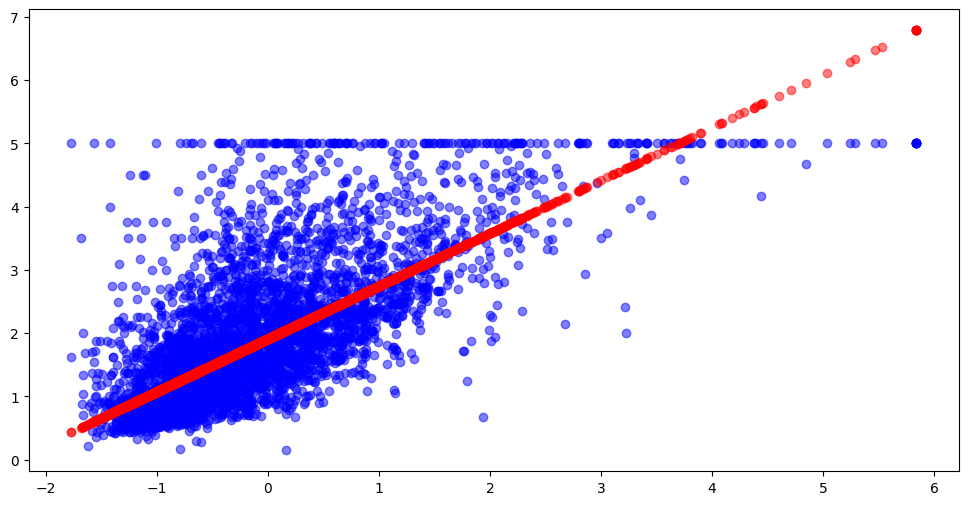

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x_single_feature_test[:,0],y_test,color = 'blue',label = 'Actual' , alpha=.5)
plt.scatter(x_single_feature_test[:,0],y_pred_single,color = 'red',label = 'svr_prediction' , alpha=.5)

In [14]:
x_train_2d = x_train_scaled[:,[0,1]]
x_test_2d = x_test_scaled[:, [0,1]]

In [15]:
svr_2d = SVR(kernel='linear' , C = 100 , epsilon=.1)
svr_2d.fit(x_train_2d,y_train)

SVR(C=100, kernel='linear')

In [16]:
y_pred_2d = svr_2d.predict(x_test_2d)

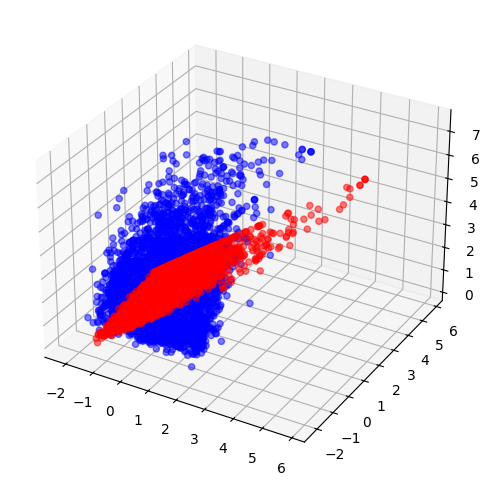

In [17]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test_2d[:, 1] , x_test_2d[: , 0] , y_test , color  = 'blue' , label = 'Actual' , alpha = .5)
ax.scatter(x_test_2d[:, 0] , x_test_2d[: , 1] , y_pred_2d , color  = 'red' , label = 'Actual' , alpha = .5)